# Capstone 5: Florida bike rentals

## Imports

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('FloridaBikeRentals.csv')
bike_rentals_df = df.copy(deep=True)
bike_rentals_df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
bike_rentals_df.sample(20)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6092,11/08/2018,1469,20,32.8,47,1.9,2000,19.9,0.01,0.0,0.0,Summer,No Holiday,Yes
490,21/12/2017,169,10,-3.0,71,0.7,608,-7.5,0.67,0.0,2.1,Winter,No Holiday,Yes
2382,10/03/2018,74,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,Spring,No Holiday,Yes
7319,01/10/2018,1057,23,13.4,69,3.7,2000,7.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
2085,25/02/2018,239,21,0.2,55,2.5,1942,-7.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2407,11/03/2018,119,7,2.9,84,1.9,241,0.4,0.00,0.0,0.0,Spring,No Holiday,Yes
2249,04/03/2018,492,17,11.8,82,1.7,990,8.8,0.40,0.0,0.0,Spring,No Holiday,Yes
8450,18/11/2018,335,2,2.9,49,2.0,1989,-6.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
1011,12/01/2018,42,3,-14.1,45,1.8,2000,-23.4,0.00,0.0,0.0,Winter,No Holiday,Yes
6530,30/08/2018,80,2,24.7,96,1.0,337,24.0,0.00,6.5,0.0,Summer,No Holiday,Yes


## Sample analysis

- Holiday looks like it can be a bool -> recommend converting to bool
- Functioning day yes/no -> recommend converting to bool

In [5]:
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
bike_rentals_df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Stats Analysis

- Bike count max looks skewed, over double of 75% quartile

In [7]:
print('Missing values per column:')
bike_rentals_df.isnull().sum()

Missing values per column:


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

## Data Visualization Numerical

In [8]:
numerical_features = bike_rentals_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

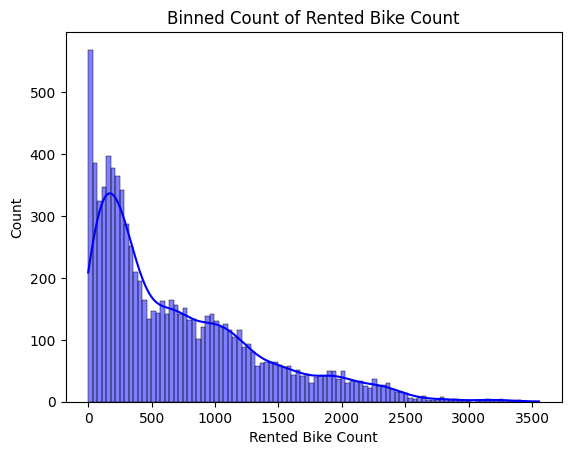

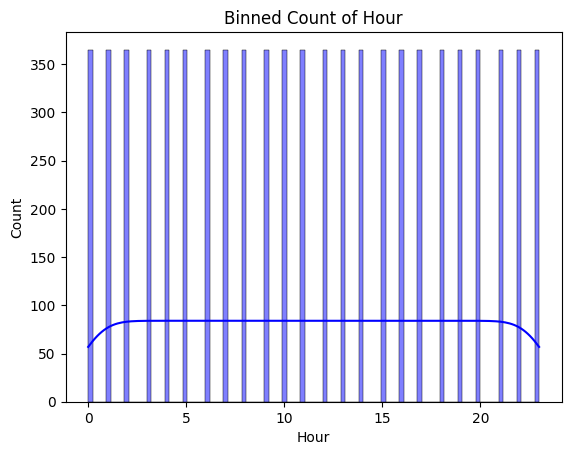

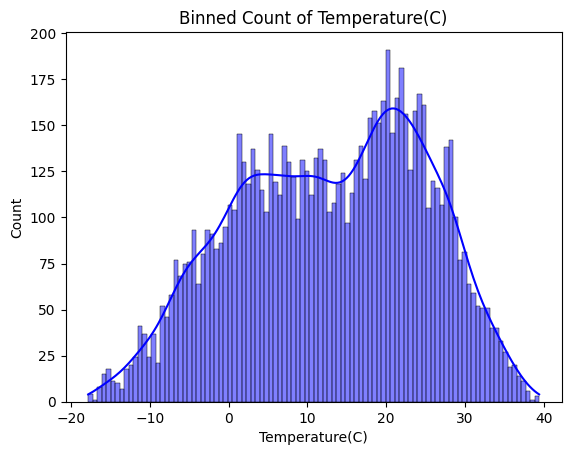

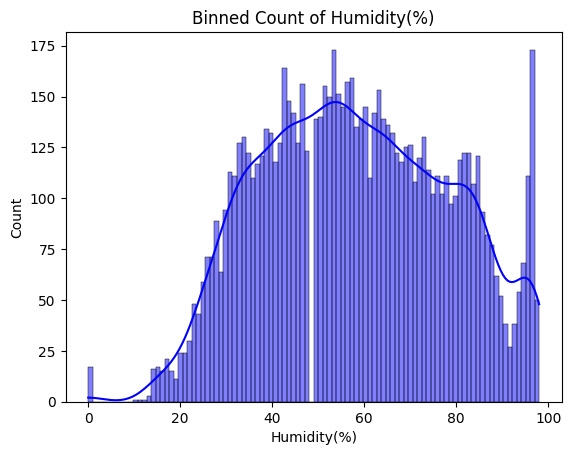

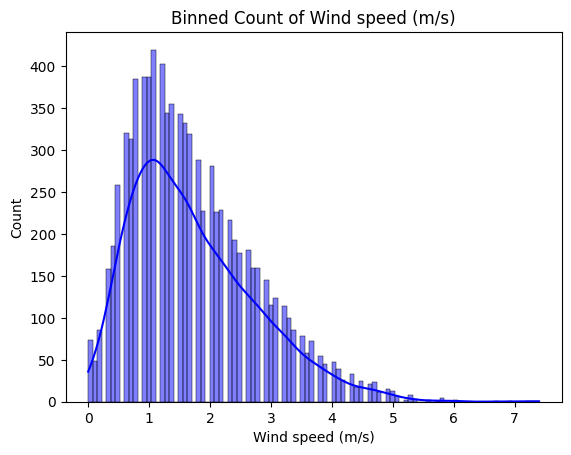

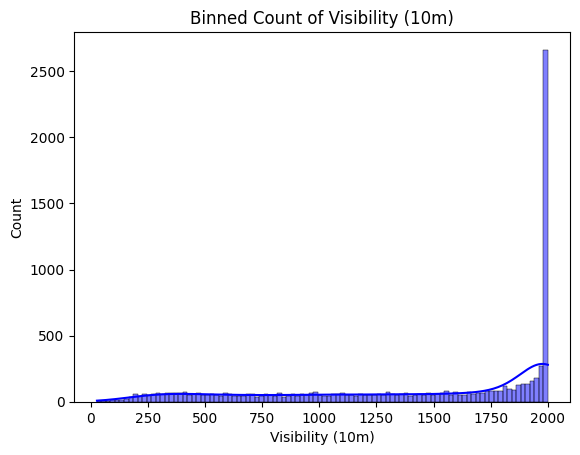

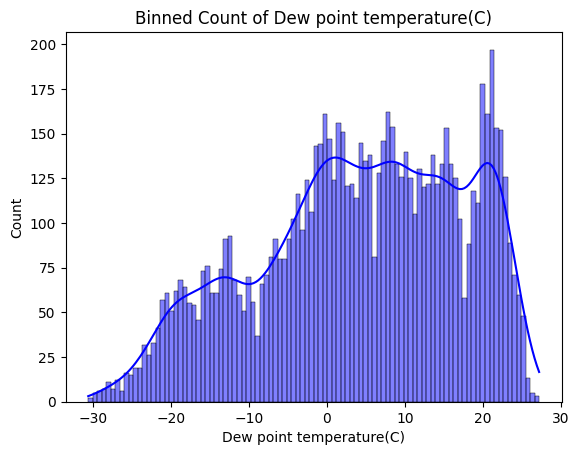

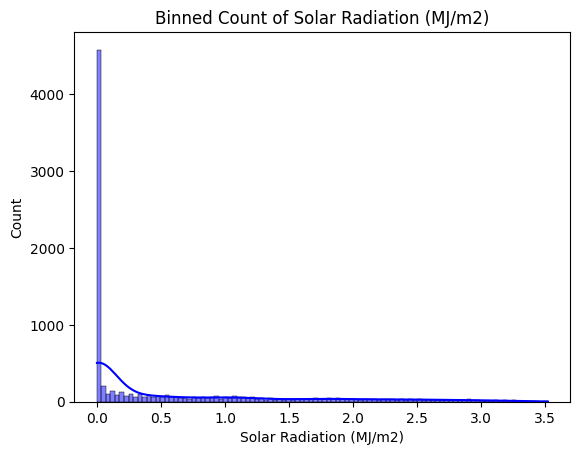

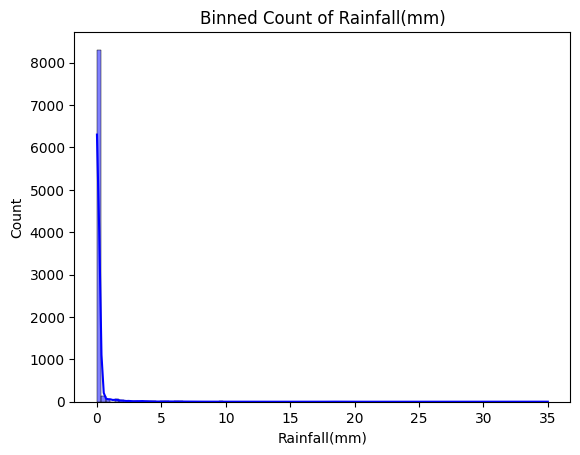

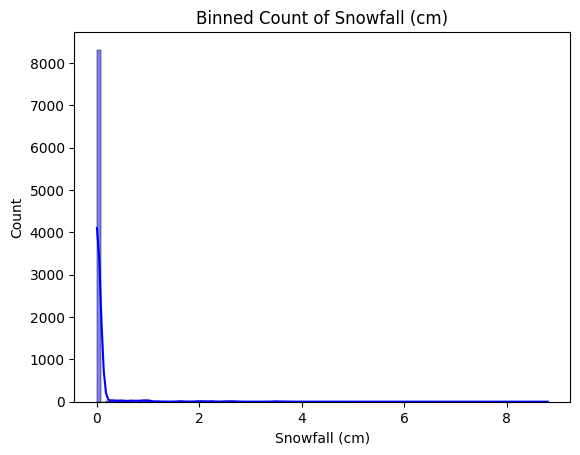

In [9]:
for feature in numerical_features:
    sns.histplot(data=bike_rentals_df, x=f'{feature}', bins=100, color='blue', kde=True)
    plt.title(f'Binned Count of {feature}')

    plt.show()

## Apply Feature Engineering

### Numerical Data Transforming

Performing the Yeo Johnson Power Transform because we have potential negative values, this can handle that for us

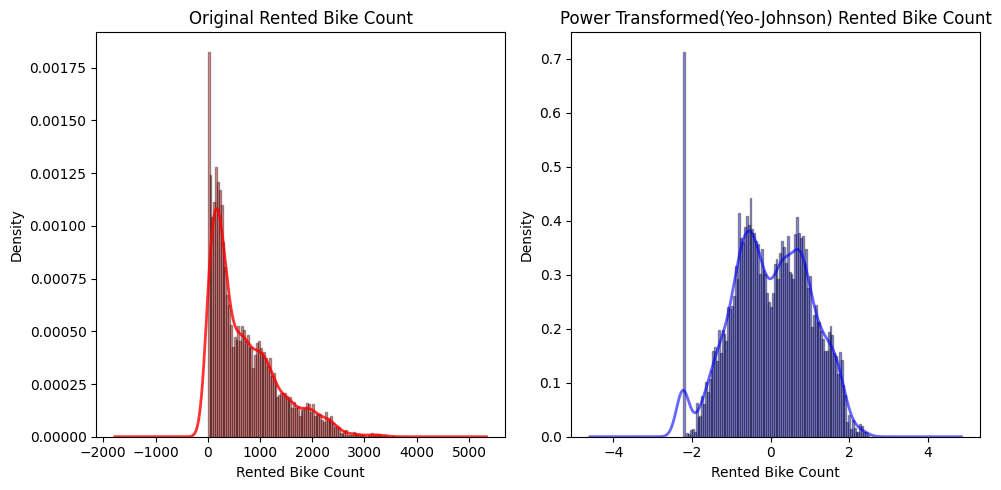

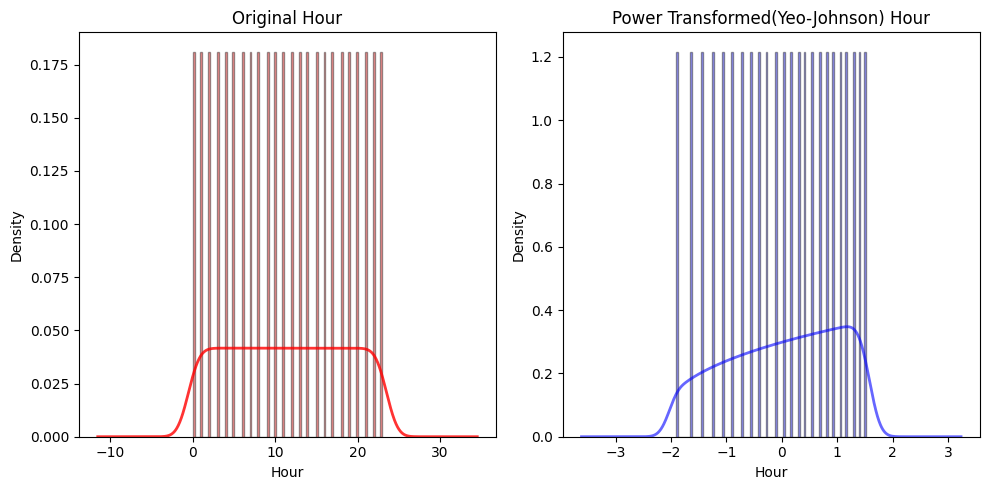

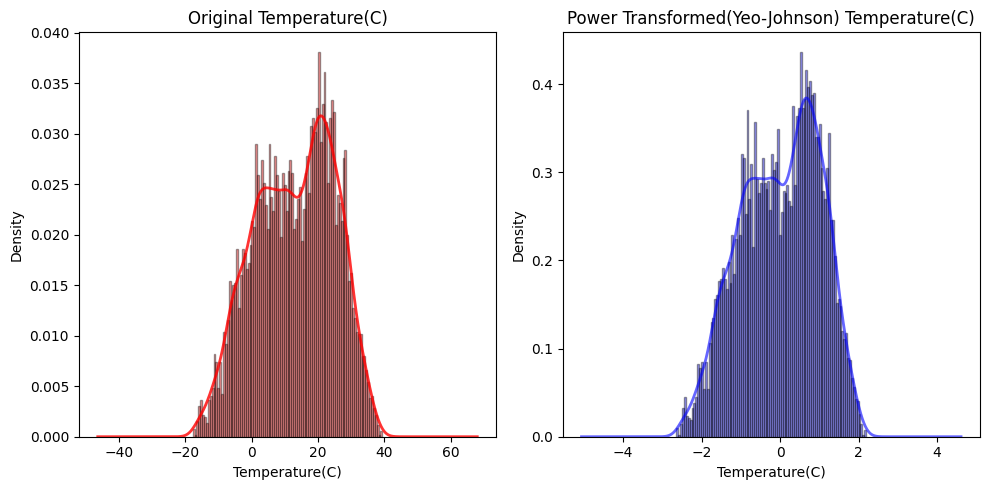

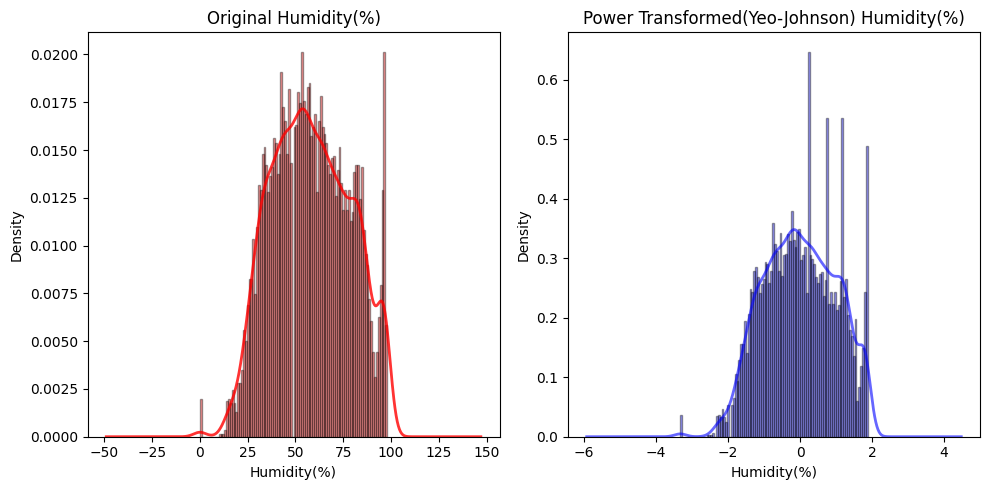

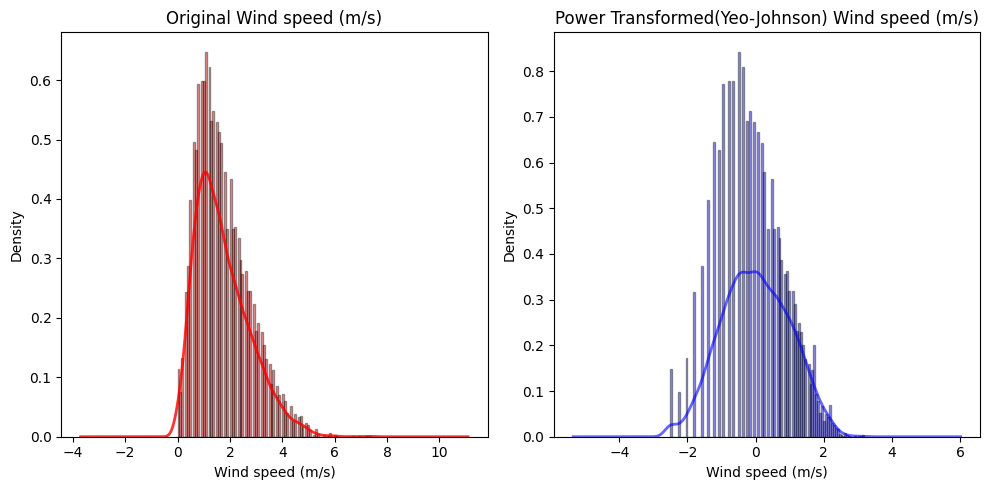

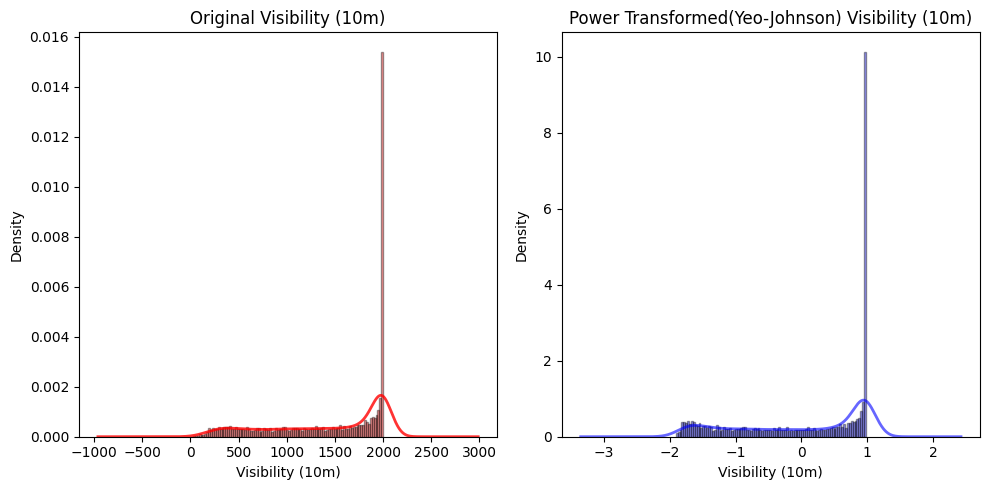

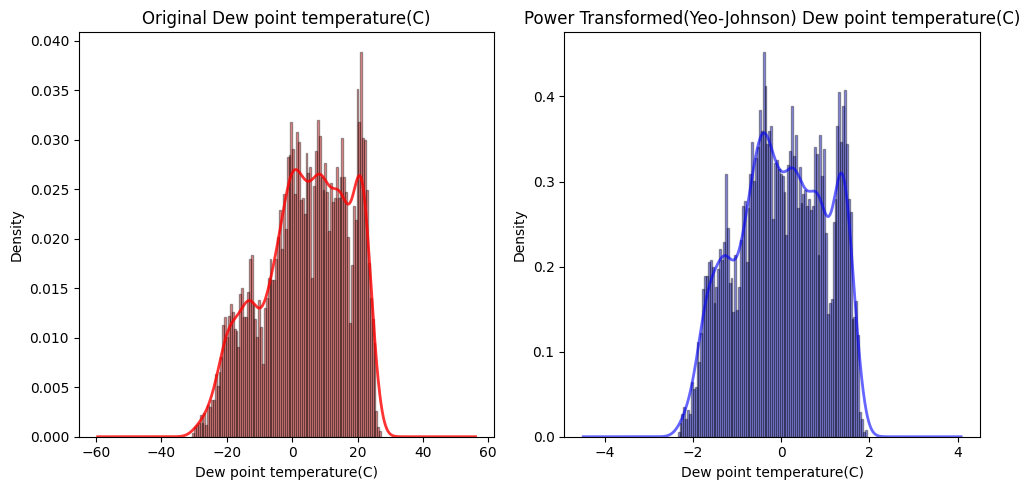

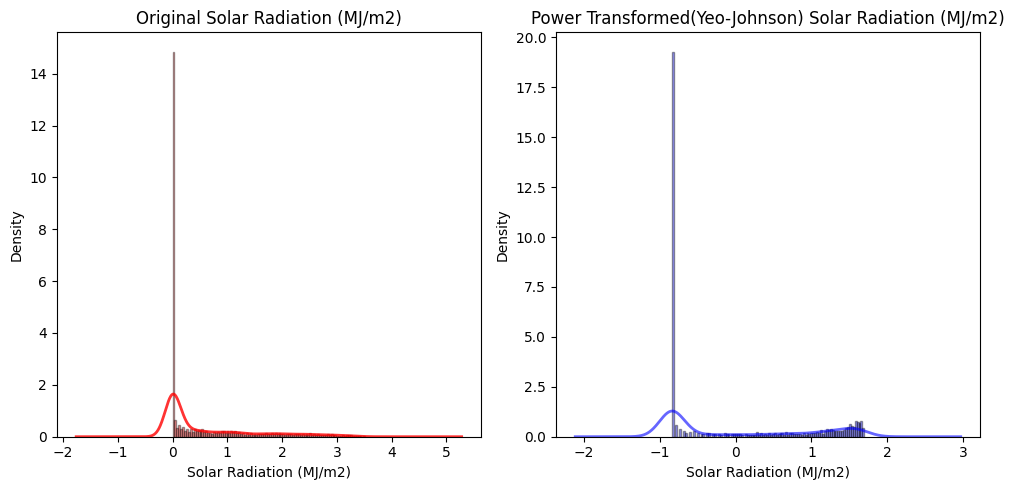

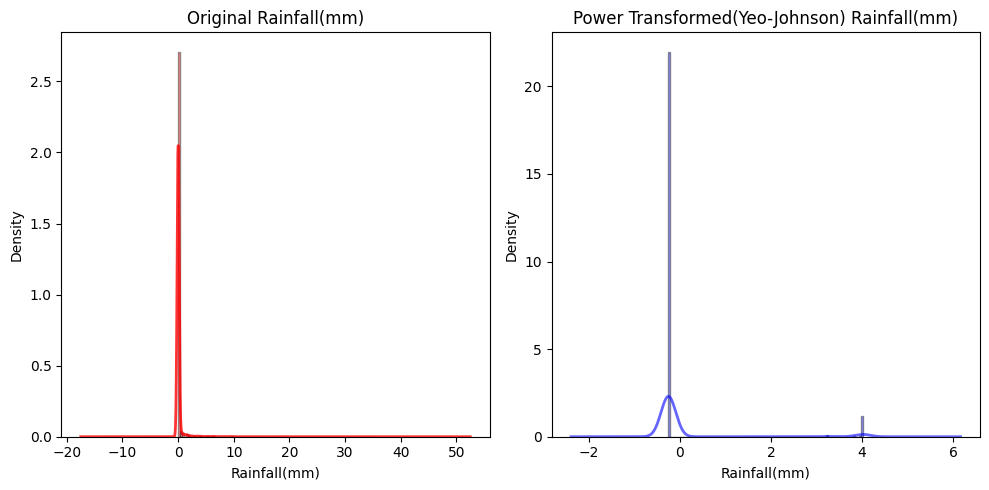

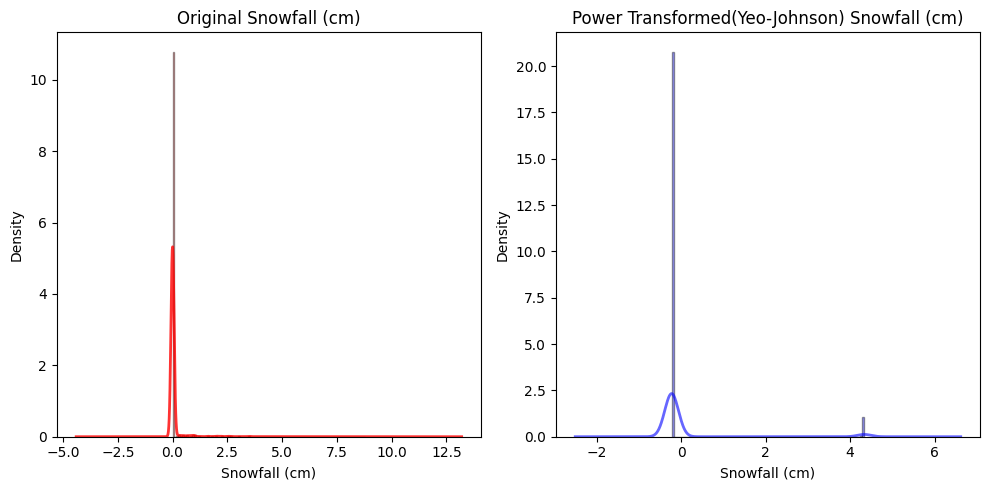

In [10]:
transformer = PowerTransformer()

for feature in numerical_features:
    bike_rentals_df[f'{feature}_power'] = transformer.fit_transform(bike_rentals_df[[feature]])

    #Visualize
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].hist(bike_rentals_df[feature], bins=100, color='red', edgecolor='black', alpha=0.4, density=True)
    axes[0].set_title(f'Original {feature}')
    axes[0].set_xlabel(f'{feature}')
    bike_rentals_df[feature].plot(kind='density', ax=axes[0], color='red', alpha=0.8, linewidth=2, label=f'{feature} PDF')

    axes[1].hist(bike_rentals_df[f'{feature}_power'], bins=100, color='blue', edgecolor='black', alpha=0.4, density=True)
    axes[1].set_title(f'Power Transformed(Yeo-Johnson) {feature}')
    axes[1].set_xlabel(f'{feature}')
    bike_rentals_df[f'{feature}_power'].plot(kind='density', ax=axes[1], color='blue', alpha=0.6, linewidth=2, label=f'{feature}_power PDF')

    plt.tight_layout()
    plt.show()


### Scaling Features

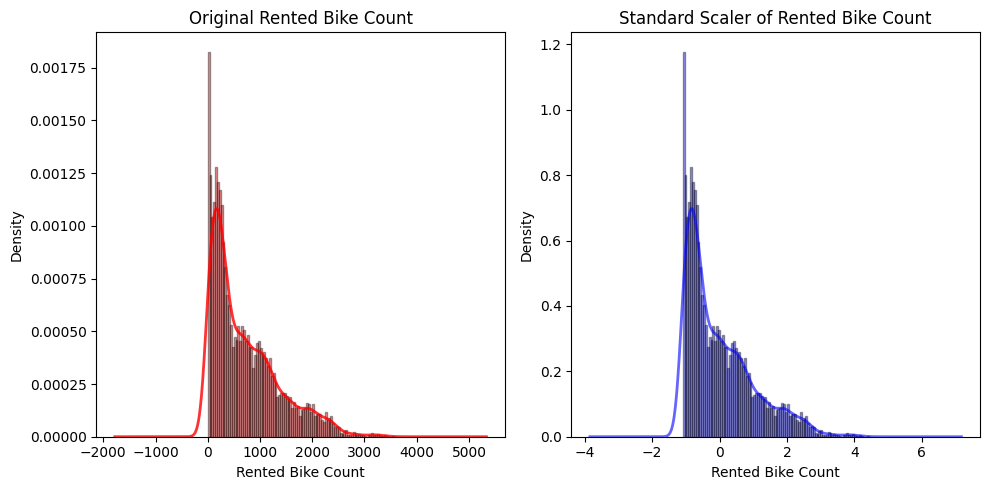

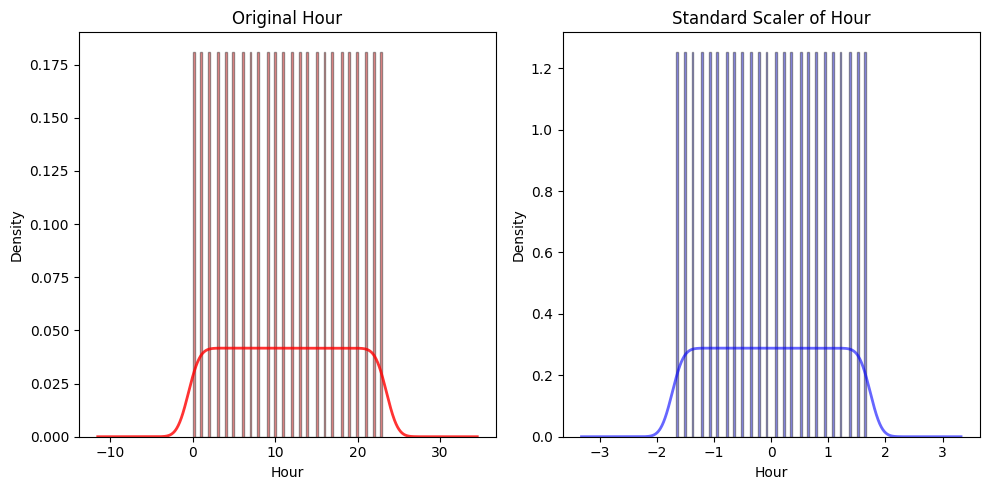

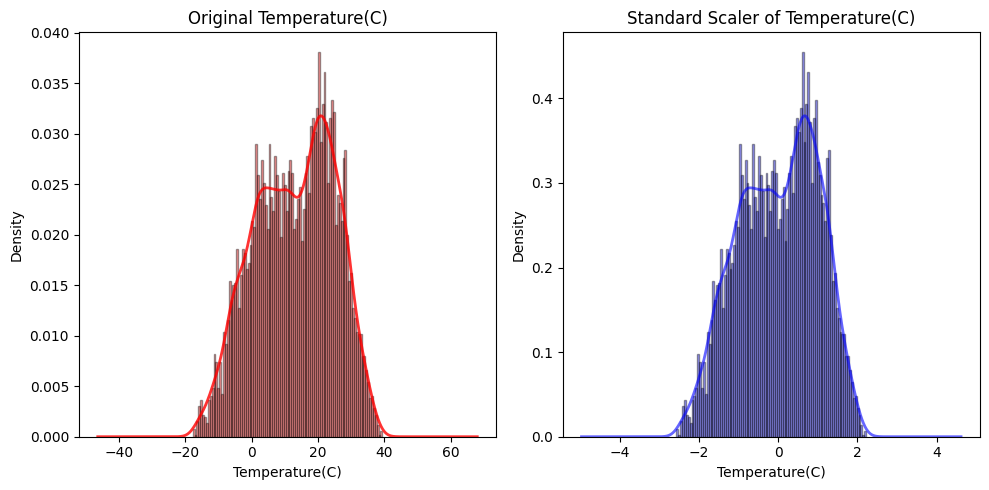

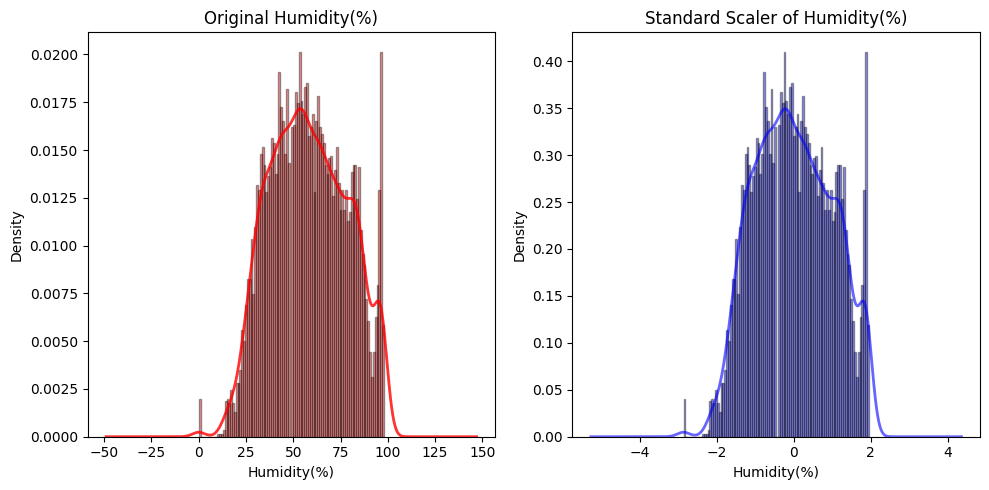

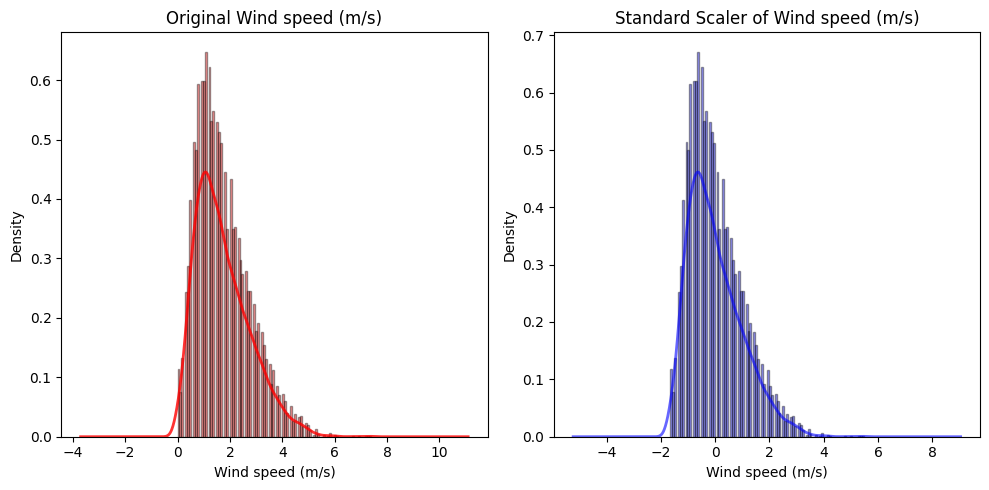

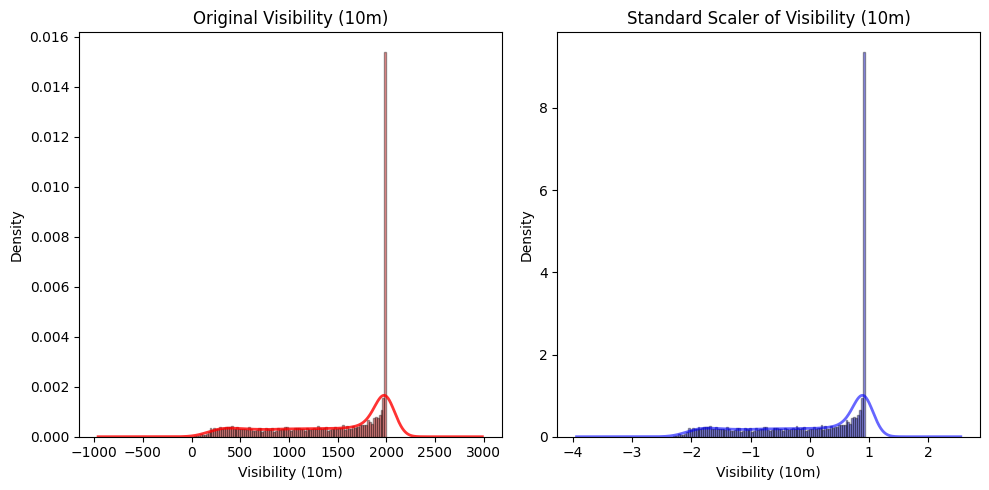

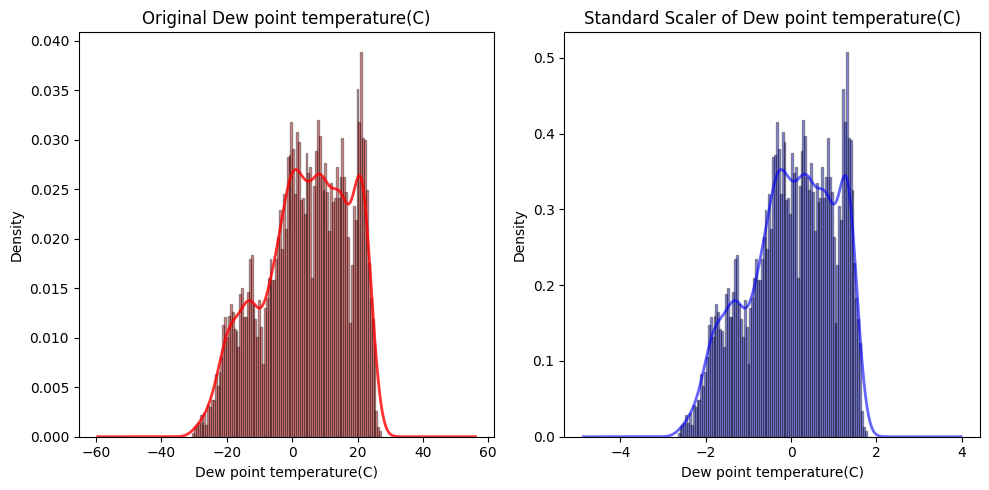

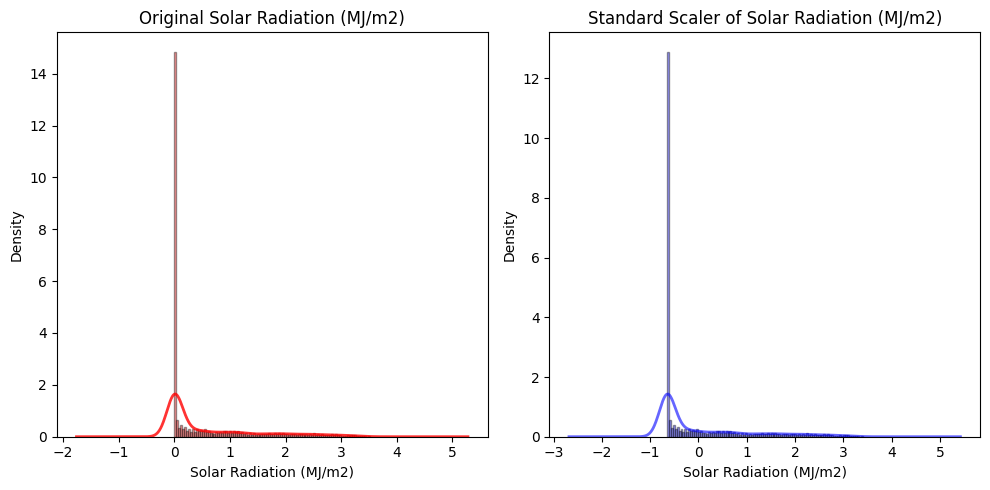

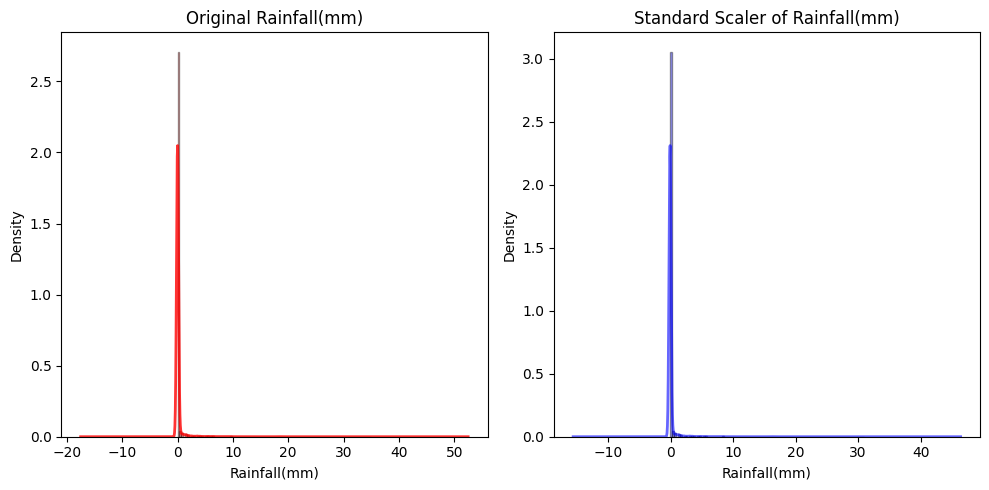

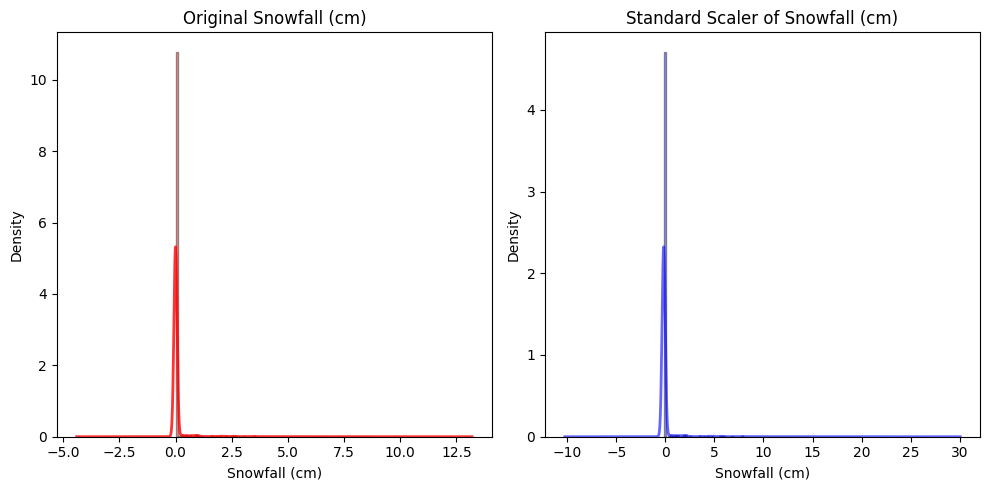

In [11]:
#Apply standard scaler
scaler = StandardScaler()

for feature in numerical_features:
    bike_rentals_df[f'{feature}_standard'] = scaler.fit_transform(bike_rentals_df[[feature]])

    #Visualize
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].hist(bike_rentals_df[feature], bins=100, color='red', edgecolor='black', alpha=0.4, density=True)
    axes[0].set_title(f'Original {feature}')
    axes[0].set_xlabel(f'{feature}')
    bike_rentals_df[feature].plot(kind='density', ax=axes[0], color='red', alpha=0.8, linewidth=2, label=f'{feature} PDF')

    axes[1].hist(bike_rentals_df[f'{feature}_standard'], bins=100, color='blue', edgecolor='black', alpha=0.4, density=True)
    axes[1].set_title(f'Standard Scaler of {feature}')
    axes[1].set_xlabel(f'{feature}')
    bike_rentals_df[f'{feature}_standard'].plot(kind='density', ax=axes[1], color='blue', alpha=0.6, linewidth=2, label=f'{feature}_standard PDF')

    plt.tight_layout()
    plt.show()

### Handling Dates

In [12]:
bike_rentals_df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Rented Bike Count_standard,Hour_standard,Temperature(C)_standard,Humidity(%)_standard,Wind speed (m/s)_standard,Visibility (10m)_standard,Dew point temperature(C)_standard,Solar Radiation (MJ/m2)_standard,Rainfall(mm)_standard,Snowfall (cm)_standard
5698,26/07/2018,644,10,29.5,68,1.8,946,22.9,0.54,0.0,...,-0.093962,-0.216695,1.391232,0.480017,0.072465,-0.806929,1.441557,-0.033511,-0.131800,-0.171891
4573,09/06/2018,1583,13,28.8,42,2.0,1438,14.6,2.38,0.0,...,1.361940,0.216695,1.332626,-0.796918,0.265470,0.001930,0.806010,2.084605,-0.131800,-0.171891
5740,28/07/2018,340,4,28.3,83,1.7,814,25.1,0.00,0.0,...,-0.565309,-1.083473,1.290765,1.216710,-0.024038,-1.023940,1.610015,-0.655132,-0.131800,-0.171891
6525,29/08/2018,22,21,23.7,98,0.6,410,23.3,0.00,5.5,...,-1.058362,1.372399,0.905639,1.953404,-1.085567,-1.688125,1.472185,-0.655132,4.743531,-0.171891
4195,24/05/2018,2334,19,21.1,44,2.6,1512,8.3,0.41,0.0,...,2.526352,1.083473,0.687959,-0.698693,0.844486,0.123588,0.323607,-0.183160,-0.131800,-0.171891
3150,11/04/2018,0,6,9.0,86,2.0,442,6.7,0.00,0.0,...,-1.092473,-0.794547,-0.325090,1.364049,0.265470,-1.635517,0.201092,-0.655132,-0.131800,-0.171891
2516,15/03/2018,533,20,10.5,97,1.8,372,10.0,0.00,0.0,...,-0.266066,1.227936,-0.199506,1.904291,0.072465,-1.750598,0.453779,-0.655132,-0.131800,-0.171891
5819,31/07/2018,583,11,34.1,40,1.5,1947,18.5,2.80,0.0,...,-0.188542,-0.072232,1.776358,-0.895144,-0.217043,0.838738,1.104640,2.568088,-0.131800,-0.171891
282,12/12/2017,529,18,-7.7,36,1.0,2000,-20.2,0.00,0.0,...,-0.272268,0.939010,-1.723265,-1.091596,-0.699556,0.925871,-1.858692,-0.655132,-0.131800,-0.171891
7588,13/10/2018,226,4,7.1,79,1.2,1567,3.6,0.00,0.0,...,-0.742064,-1.083473,-0.484164,1.020259,-0.506551,0.214009,-0.036281,-0.655132,-0.131800,-0.171891


In [13]:
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               8760 non-null   object 
 1   Rented Bike Count                  8760 non-null   int64  
 2   Hour                               8760 non-null   int64  
 3   Temperature(C)                     8760 non-null   float64
 4   Humidity(%)                        8760 non-null   int64  
 5   Wind speed (m/s)                   8760 non-null   float64
 6   Visibility (10m)                   8760 non-null   int64  
 7   Dew point temperature(C)           8760 non-null   float64
 8   Solar Radiation (MJ/m2)            8760 non-null   float64
 9   Rainfall(mm)                       8760 non-null   float64
 10  Snowfall (cm)                      8760 non-null   float64
 11  Seasons                            8760 non-null   objec

In [14]:
categorical_features = bike_rentals_df.select_dtypes(include=['object']).columns.to_list()
categorical_features

['Date', 'Seasons', 'Holiday', 'Functioning Day']

We know Date isn't a real category, lets convert that first and extract the day, months, year

#### Extract Date

In [15]:
bike_rentals_df['Date'] = pd.to_datetime(bike_rentals_df['Date'], format='%d/%m/%Y')
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               8760 non-null   datetime64[ns]
 1   Rented Bike Count                  8760 non-null   int64         
 2   Hour                               8760 non-null   int64         
 3   Temperature(C)                     8760 non-null   float64       
 4   Humidity(%)                        8760 non-null   int64         
 5   Wind speed (m/s)                   8760 non-null   float64       
 6   Visibility (10m)                   8760 non-null   int64         
 7   Dew point temperature(C)           8760 non-null   float64       
 8   Solar Radiation (MJ/m2)            8760 non-null   float64       
 9   Rainfall(mm)                       8760 non-null   float64       
 10  Snowfall (cm)                      8

In [16]:
bike_rentals_df['Year'] = bike_rentals_df['Date'].dt.year
bike_rentals_df['Month'] = bike_rentals_df['Date'].dt.month
bike_rentals_df['Day'] = bike_rentals_df['Date'].dt.day
bike_rentals_df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Humidity(%)_standard,Wind speed (m/s)_standard,Visibility (10m)_standard,Dew point temperature(C)_standard,Solar Radiation (MJ/m2)_standard,Rainfall(mm)_standard,Snowfall (cm)_standard,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,2018,11,30


In [17]:
categorical_features = bike_rentals_df.select_dtypes(include=['object']).columns.to_list()
categorical_features

['Seasons', 'Holiday', 'Functioning Day']

### Handling Categories

In [18]:
#check categorical values
for category in categorical_features:
    print(f'{bike_rentals_df[category].value_counts()}\n')

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64



#### Encode Seasons

In [19]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_array = encoder.fit_transform(bike_rentals_df[['Seasons']])

onehot_df_seasons = pd.DataFrame(
    onehot_array,
    columns=encoder.get_feature_names_out(['Seasons']),
    index=bike_rentals_df.index
)

#Concat new features into our biker df
bike_rentals_df = pd.concat([bike_rentals_df, onehot_df_seasons], axis=1)

print('Seasons encoded:')
onehot_df_seasons.sample(10)

Seasons encoded:


,Seasons_Spring,Seasons_Summer,Seasons_Winter
8340,0.0,0.0,0.0
3504,1.0,0.0,0.0
4112,1.0,0.0,0.0
7083,0.0,0.0,0.0
3794,1.0,0.0,0.0
4374,0.0,1.0,0.0
5056,0.0,1.0,0.0
5504,0.0,1.0,0.0
5708,0.0,1.0,0.0
8018,0.0,0.0,0.0


#### Encode Holiday

In [20]:
bike_rentals_df['Holiday'] = bike_rentals_df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
bike_rentals_df['Holiday'].sample(10)

3506    0
2805    0
5914    0
7849    0
5452    0
5507    0
3104    0
6954    0
321     0
1317    0
Name: Holiday, dtype: int64

#### Encode Functioning Day

In [21]:
bike_rentals_df['Functioning Day'] = bike_rentals_df['Functioning Day'].map({'No': 0, 'Yes': 1})
bike_rentals_df['Functioning Day'].sample(10)

3665    1
1894    1
3767    1
7431    1
4688    1
2935    1
2112    1
6549    1
318     1
3124    1
Name: Functioning Day, dtype: int64

### Data Optimization

Perform the following:
- Rented Bike Count -> uint16
- hour -> uint8
- temp -> int8
- humidity -> uint8
- visibility -> uint16
- dew -> int8
- solar -> uint8
- rainfall -> uint8
- snowfall -> uint8
- holiday -> boolean
- functioning day -> boolean

In [33]:
pd.set_option('display.max_columns', None)
bike_rentals_df.describe()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Rented Bike Count_power,Hour_power,Temperature(C)_power,Humidity(%)_power,Wind speed (m/s)_power,Visibility (10m)_power,Dew point temperature(C)_power,Solar Radiation (MJ/m2)_power,Rainfall(mm)_power,Snowfall (cm)_power,Rented Bike Count_standard,Hour_standard,Temperature(C)_standard,Humidity(%)_standard,Wind speed (m/s)_standard,Visibility (10m)_standard,Dew point temperature(C)_standard,Solar Radiation (MJ/m2)_standard,Rainfall(mm)_standard,Snowfall (cm)_standard,Year,Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,1.557354e-16,1.825024e-16,1.038236e-16,1.297795e-16,-5.191180e-17,2.595590e-16,0.000000,6.488975e-17,6.164526e-17,6.488975e-17,2.595590e-17,-3.852829e-18,1.557354e-16,1.297795e-16,-3.893385e-17,-3.893385e-17,-5.191180e-17,1.297795e-17,0.000000,-6.488975e-18,2017.915068,6.526027,15.720548,0.252055,0.252055,0.246575
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.237130e+00,-1.902967e+00,-2.640013e+00,-3.323576e+00,-2.512537e+00,-1.906656e+00,-2.351050,-8.457613e-01,-2.528588e-01,-2.307853e-01,-1.092473e+00,-1.661325e+00,-2.568868e+00,-2.859660e+00,-1.664583e+00,-2.317786e+00,-2.655039e+00,-6.551317e-01,-0.131800,-1.718911e-01,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.183346e-01,-7.667177e-01,-7.748272e-01,-7.793079e-01,-7.782032e-01,-9.266806e-01,-0.731450,-8.457613e-01,-2.528588e-01,-2.307853e-01,-7.963308e-01,-8.306624e-01,-7.855668e-01,-7.969184e-01,-7.960588e-01,-8.167930e-01,-6.718274e-01,-6.551317e-01,-0.131800,-1.718911e-01,2018.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,8.901542e-03,8.758295e-02,7.641456e-02,-2.896422e-02,-4.175239e-02,3.768217e-01,0.000136,-7.927406e-01,-2.528588e-01,-2.307853e-01,-3.102547e-01,0.000000e+00,6.840822e-02,-6.022497e-02,-2.170429e-01,4.293764e-01,7.857709e-02,-6.436202e-01,-0.131800,-1.718911e-01,2018.000000,7.000000,16.000000,0.000000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,7.639707e-01,8.360358e-01,8.040896e-01,7.823837e-01,7.001838e-01,9.782138e-01,0.828962,1.115979e+00,-2.528588e-01,-2.307853e-01,5.591782e-01,8.306624e-01,8.051710e-01,7.746943e-01,5.549784e-01,9.258713e-01,8.213244e-01,4.154376e-01,-0.131800,-1.718911e-01,2018.000000,10.000000,23.000000,1.000000,1.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,2.485780e+00,1.521129e+00,2.192585e+00,1.876751e+00,3.174365e+00,9.782138e-01,1.935283,1.699041e+00,4.021693e+00,4.337315e+00,4.421042e+00,1.661325e+00,2.220090e+00,1.953404e+00,5.476614e+00,9.258713e-01,1.770816e+00,3.396916e+00,30.893033,1.997826e+01,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000
std,NaN,644.997468,6.9

In [34]:
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               8760 non-null   datetime64[ns]
 1   Rented Bike Count                  8760 non-null   int64         
 2   Hour                               8760 non-null   int64         
 3   Temperature(C)                     8760 non-null   float64       
 4   Humidity(%)                        8760 non-null   int64         
 5   Wind speed (m/s)                   8760 non-null   float64       
 6   Visibility (10m)                   8760 non-null   int64         
 7   Dew point temperature(C)           8760 non-null   float64       
 8   Solar Radiation (MJ/m2)            8760 non-null   float64       
 9   Rainfall(mm)                       8760 non-null   float64       
 10  Snowfall (cm)                      8

## Export Engineered to CSV 

In [35]:
bike_rentals_df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count_power,Hour_power,Temperature(C)_power,Humidity(%)_power,Wind speed (m/s)_power,Visibility (10m)_power,Dew point temperature(C)_power,Solar Radiation (MJ/m2)_power,Rainfall(mm)_power,Snowfall (cm)_power,Rented Bike Count_standard,Hour_standard,Temperature(C)_standard,Humidity(%)_standard,Wind speed (m/s)_standard,Visibility (10m)_standard,Dew point temperature(C)_standard,Solar Radiation (MJ/m2)_standard,Rainfall(mm)_standard,Snowfall (cm)_standard,Year,Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
110,2017-12-05,334,14,-1.1,28,0.0,2000,-17.3,0.00,0.0,0.0,Winter,0,1,-0.330416,0.422913,-1.166539,-1.521515,-2.512537,0.978214,-1.538198,-0.845761,-0.252859,-0.230785,-0.574612,0.361158,-1.170693,-1.484499,-1.664583,0.925871,-1.636633,-0.655132,-0.1318,-0.171891,2017,12,5,0.0,0.0,1.0
7732,2018-10-19,184,4,8.1,76,0.3,2000,4.1,0.00,0.0,0.0,Autumn,0,1,-0.741630,-1.062616,-0.389420,0.875643,-1.801586,0.978214,-0.082083,-0.845761,-0.252859,-0.230785,-0.807184,-1.083473,-0.400441,0.872920,-1.375075,0.925871,0.002005,-0.655132,-0.1318,-0.171891,2018,10,19,0.0,0.0,0.0
656,2017-12-28,554,8,-4.7,30,0.6,2000,-19.6,0.00,0.0,0.0,Winter,0,1,0.092987,-0.414383,-1.480643,-1.412282,-1.240914,0.978214,-1.680785,-0.845761,-0.252859,-0.230785,-0.233506,-0.505621,-1.472096,-1.386273,-1.085567,0.925871,-1.812748,-0.655132,-0.1318,-0.171891,2017,12,28,0.0,0.0,1.0
2276,2018-03-05,578,20,4.3,57,1.3,2000,-3.4,0.00,0.0,0.0,Spring,0,1,0.132005,1.170220,-0.707539,-0.028964,-0.265185,0.978214,-0.644028,-0.845761,-0.252859,-0.230785,-0.196294,1.227936,-0.718588,-0.060225,-0.410048,0.925871,-0.572284,-0.655132,-0.1318,-0.171891,2018,3,5,1.0,0.0,0.0
1715,2018-02-10,235,11,2.6,62,2.9,294,-3.9,1.12,0.0,0.0,Winter,0,1,-0.583260,0.018839,-0.850709,0.213418,1.145124,-1.724386,-0.677814,1.238503,-0.252859,-0.230785,-0.728110,-0.072232,-0.860918,0.185340,1.133994,-1.878832,-0.610570,0.634156,-0.1318,-0.171891,2018,2,10,0.0,0.0,1.0
5625,2018-07-23,985,9,31.0,55,1.5,1945,20.8,1.14,0.0,0.0,Summer,0,1,0.675257,-0.266097,1.503615,-0.126900,-0.041752,0.865607,1.359514,1.249529,-0.252859,-0.230785,0.434752,-0.361158,1.516817,-0.158451,-0.217043,0.835450,1.280756,0.657179,-0.1318,-0.171891,2018,7,23,0.0,1.0,0.0
5556,2018-07-20,822,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,Summer,0,1,0.479421,0.156327,1.635007,-0.324588,0.533376,-1.129058,1.386297,1.679325,-0.252859,-0.230785,0.182023,0.072232,1.650774,-0.354902,0.361973,-1.046956,1.303727,3.040059,-0.1318,-0.171891,2018,7,20,0.0,1.0,0.0
538,2017-12-23,235,10,5.4,82,1.2,215,2.5,0.13,0.0,0.0,Winter,0,1,-0.583260,-0.121844,-0.615223,1.153002,-0.384415,-1.792127,-0.211526,-0.262660,-0.252859,-0.230785,-0.728110,-0.216695,-0.626493,1.167597,-0.506551,-2.008710,-0.120510,-0.505482,-0.1318,-0.171891,2017,12,23,0.0,0.0,1.0
8281,2018-11-11,518,1,8.8,89,0.7,213,7.0,0.00,0.0,0.0,Autumn,0,1,0.032347,-1.654871,-0.331029,1.472320,-1.077544,-1.793722,0.158520,-0.845761,-0.252859,-0.230785,-0.289323,-1.516862,-0.341835,1.511388,-0.989064,-2.011998,0.224064,-0.655132,-0.1318,-0.171891,2018,11,11,0.0,0.0,0.0
1282,2018-01-23,132,10,-12.1,34,3.5,1968,-24.8,0.62,0.0,1.0,Winter,0,1,-0.935864,-0.121844,-2.133579,-1.197308,1.525377,0.912535,-1.999783,0.815334,-0.252859,4.337315,-0.887809,-0.216695,-2.091646,-1.189822,1.713010,0.873263,-2.210922,0.058581,-0.1318,2.117899,2018,1,23,0.0,0.0,1.0


In [36]:
pd.reset_option('display.max_columns')

In [37]:
#Export engineered data
bike_rentals_df.to_csv('bike_rental_features.csv', index=False)

## Model Building

In [38]:
train_split_df = bike_rentals_df.drop(columns=['Seasons', 'Date', 'Rented Bike Count_power', 'Rented Bike Count_standard']).copy()
bike_rental_train, bike_rental_test = train_test_split(train_split_df, test_size=0.2, random_state=67)

print(f'Training df shape: {bike_rental_train.shape}')
print(f'Testing df shape: {bike_rental_test.shape}')

Training df shape: (7008, 36)
Testing df shape: (1752, 36)


In [39]:
results = {
    'model': [],
    'score': []
}

test_scores = {
    'model': [],
    'score': []
}

cv_folds = 10

### Linear Regression Model

In [40]:
#RMSE to expect
# expected_rmse = root_mean_squared_error(bike_rental_train, np.full_like(bike_rental_train, bike_rental_train.mean()))
# print(f'Untrained RMSE: {expected_rmse}')

In [ ]:
model = LinearRegression()

fit_result = model.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

train_predictions = model.predict(
    bike_rental_train.drop(columns='Rented Bike Count')
)

train_rmse = root_mean_squared_error(bike_rental_train['Rented Bike Count'], train_predictions)
train_mae = mean_absolute_error(bike_rental_train['Rented Bike Count'], train_predictions)
train_r2s = r2_score(bike_rental_train['Rented Bike Count'], train_predictions)

print(f'Training RMSE: {train_rmse}')
print(f'Training MAE: {train_mae}')
print(f'Training R2 Score: {train_r2s}')

results['model'].extend(['Linear Regression'] * cv_folds)
results['score'].extend(-scores)

Training RMSE: 396.8216478854344
Training MAE: 297.2669757368302
Training R2 Score: 0.6264201382630579


In [42]:
test_predictions = model.predict(
    bike_rental_test.drop(columns='Rented Bike Count')
)

test_rmse = root_mean_squared_error(bike_rental_test['Rented Bike Count'], test_predictions)
test_mae = mean_absolute_error(bike_rental_test['Rented Bike Count'], test_predictions)
test_r2s = r2_score(bike_rental_test['Rented Bike Count'], test_predictions)

print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing R2 Score: {test_r2s}')

Testing RMSE: 387.3598687397809
Testing MAE: 289.2017148170306
Testing R2 Score: 0.6182577548154591


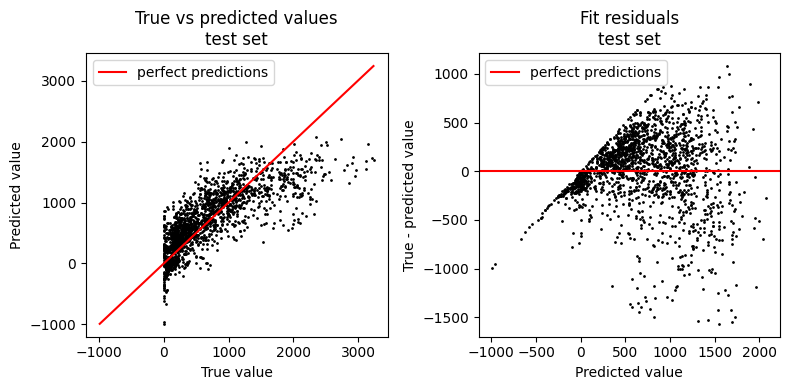

In [43]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs = axs.flatten()

test_min = int(min(bike_rental_test['Rented Bike Count'].min(), test_predictions.min()))
test_max = int(max(bike_rental_test['Rented Bike Count'].max(), test_predictions.max()))

axs[0].set_title('True vs predicted values\ntest set')
axs[0].scatter(bike_rental_test['Rented Bike Count'], test_predictions, s=1, color='black')
axs[0].plot(list(range(test_min, test_max+5, 10)), list(range(test_min, test_max+5, 10)), color='red', label='perfect predictions')
axs[0].set_xlabel('True value')
axs[0].set_ylabel('Predicted value')
axs[0].legend()

axs[1].set_title('Fit residuals\ntest set')
axs[1].scatter(test_predictions, test_predictions - bike_rental_test['Rented Bike Count'], s=1, color='black')
axs[1].axhline(0, color='red', label='perfect predictions')
axs[1].set_xlabel('Predicted value')
axs[1].set_ylabel('True - predicted value')
axs[1].legend()

fig.tight_layout()

In [44]:
cv_scores = cross_val_score(
    model,
    bike_rentals_df.drop(columns=['Rented Bike Count', 'Seasons', 'Date', 'Rented Bike Count_power', 'Rented Bike Count_standard']),
    bike_rentals_df['Rented Bike Count'],
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=cv_folds
)
cv_scores = -cv_scores

rmse_mean = np.mean(cv_scores)
rmse_std = np.std(cv_scores)
moe_95 = 1.95 * rmse_std / np.sqrt(len(cv_scores))

print(f'Mean cross-validation RMSE: {rmse_mean} ± {moe_95}')
print(f'95% CI: ± {rmse_mean - moe_95} to {rmse_mean + moe_95}')
print(f'Test RMSE: {test_rmse}')


Mean cross-validation RMSE: 462.0389059393052 ± 90.34319978541592
95% CI: ± 371.6957061538893 to 552.3821057247211
Test RMSE: 387.3598687397809


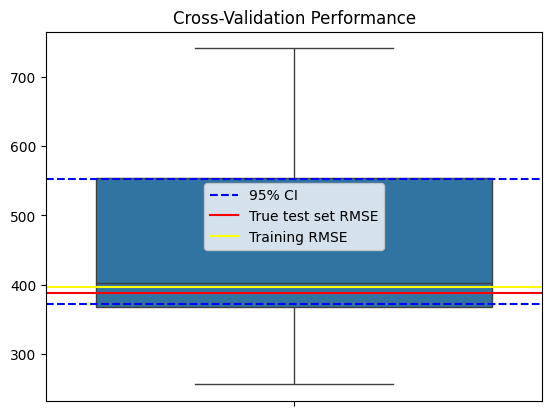

In [45]:
sns.boxplot(cv_scores)
plt.title('Cross-Validation Performance')
plt.axhline(rmse_mean - moe_95, linestyle='--', color='blue', label='95% CI')
plt.axhline(rmse_mean + moe_95, linestyle='--', color='blue')
plt.axhline(test_rmse, color='red', label='True test set RMSE')
plt.axhline(train_rmse, color='yellow', label='Training RMSE')

plt.legend()
plt.show()

### Ridge Regression

In [46]:
param_grid = {'alpha': np.logspace(-3, 3, 20)}

grid_search = GridSearchCV(
    Ridge(),
    param_grid,
    cv=cv_folds,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')
print(f'Best CV RMSE: {-grid_search.best_score_}')
print(f'Best Model: {grid_search.best_estimator_}')


Best alpha: 0.00206913808111479
Best CV RMSE: 398.1838268777942
Best Model: Ridge(alpha=np.float64(0.00206913808111479))


In [47]:
#Use best model on training set
best_ridge = grid_search.best_estimator_

train_predictions_ridge = best_ridge.predict(
    bike_rental_train.drop(columns='Rented Bike Count')
)
test_predictions_ridge = best_ridge.predict(
    bike_rental_test.drop(columns='Rented Bike Count')
)

train_rmse_ridge = root_mean_squared_error(bike_rental_train['Rented Bike Count'], train_predictions_ridge)
test_rmse_ridge = root_mean_squared_error(bike_rental_test['Rented Bike Count'], test_predictions_ridge)

print(f'Best train RMSE (ridge): {train_rmse_ridge}')
print(f'Best test RMSE (ridge): {test_rmse_ridge}')

Best train RMSE (ridge): 396.82218066000144
Best test RMSE (ridge): 387.37122258067154


### Lasso Regression

In [48]:
param_grid = {'alpha': np.logspace(-16, -11, 50)}

grid_search = GridSearchCV(
    Lasso(),
    param_grid,
    cv=cv_folds,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')
print(f'Best CV RMSE: {-grid_search.best_score_}')
print(f'Best Model: {grid_search.best_estimator_}')

Best alpha: 4.941713361323838e-12
Best CV RMSE: 407.15471287149364
Best Model: Lasso(alpha=np.float64(4.941713361323838e-12))


c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.771e+08, tolerance: 2.954e+05
  model = cd_fast.enet_coordinate_descent(


In [49]:
#Use best model on training set
best_lasso = grid_search.best_estimator_

train_predictions_lasso = best_lasso.predict(
    bike_rental_train.drop(columns='Rented Bike Count')
)
test_predictions_lasso = best_lasso.predict(
    bike_rental_test.drop(columns='Rented Bike Count')
)

train_rmse_lasso = root_mean_squared_error(bike_rental_train['Rented Bike Count'], train_predictions_lasso)
test_rmse_lasso = root_mean_squared_error(bike_rental_test['Rented Bike Count'], test_predictions_lasso)

print(f'Best train RMSE (lasso): {train_rmse_lasso}')
print(f'Best test RMSE (lasso): {test_rmse_lasso}')

Best train RMSE (lasso): 405.8468964309548
Best test RMSE (lasso): 397.55667031451316


The model is trying to perfect the alpha to a decimal point so small, we can up the cv and increase the logspace samples to try and find the perfect RMSE.

## Polynomial Features

### Linear Regression

In [50]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# Define parameter grid for optimization
param_grid = {
    'poly__degree': [2, 3],
    'poly__include_bias': [True, False],
}

grid_search_rmse = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv_folds,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

# print(f'Best Alpha: {grid_search_rmse.best_params_}')
print(f'Best Model: {grid_search.best_estimator_}')
best_model = grid_search.best_estimator_

cv_scores = cross_val_score(
    best_model,
    bike_rental_train.drop(columns=['Rented Bike Count']),
    bike_rental_train['Rented Bike Count'],
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=cv_folds
)
cv_scores = -cv_scores

print(f'Mean cross-validation RMSE: {np.mean(cv_scores)}')

# Store individual CV scores
results['model'].extend(['Optimized\nLinear Regression'] * cv_folds)
results['score'].extend(cv_scores)


c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.771e+08, tolerance: 2.954e+05
  model = cd_fast.enet_coordinate_descent(


Best Model: Lasso(alpha=np.float64(4.941713361323838e-12))
Mean cross-validation RMSE: 407.15471287149364


### Ridge Regression

In [52]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True)),
    ('ridge', Ridge())
])

# Define parameter grid for optimization
param_grid = {
    'poly__degree': [2],
    'poly__include_bias': [True, False],
    'ridge__alpha': np.logspace(-2, 2, 15)
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv_folds,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV Score: {-grid_search.best_score_}')
print(f'Best Model: {grid_search.best_estimator_}')


#Use best model on training set
best_ridge = grid_search.best_estimator_

cv_scores = cross_val_score(
    best_model,
    bike_rental_train.drop(columns=['Rented Bike Count']),
    bike_rental_train['Rented Bike Count'],
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=cv_folds
)
cv_scores = -cv_scores

print(f'Mean cross-validation RMSE: {np.mean(cv_scores)}')

# Store individual CV scores
results['model'].extend(['Optimized\nRidge Regression'] * cv_folds)
results['score'].extend(cv_scores)

c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.83418e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Best parameters: {'poly__degree': 2, 'poly__include_bias': True, 'ridge__alpha': np.float64(0.01)}
Best CV Score: 298.2790922433299
Best Model: Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('ridge', Ridge(alpha=np.float64(0.01)))])
Mean cross-validation RMSE: 407.15471287149364


### Lasso Regression

In [55]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True)),
    ('lasso', Lasso())
])

# Define parameter grid for optimization
param_grid = {
    'poly__degree': [2],
    'poly__include_bias': [True, False],
    'lasso__alpha': np.logspace(-14, -12, 15)
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv_folds,
    scoring='neg_root_mean_squared_error',
    n_jobs=-2
)

# Fit on training data
grid_search.fit(
    bike_rental_train.drop(columns='Rented Bike Count'),
    bike_rental_train['Rented Bike Count']
)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV Score: {-grid_search.best_score_}')
print(f'Best Model: {grid_search.best_estimator_}')


#Use best model on training set
best_ridge = grid_search.best_estimator_

cv_scores = cross_val_score(
    best_model,
    bike_rental_train.drop(columns=['Rented Bike Count']),
    bike_rental_train['Rented Bike Count'],
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=cv_folds
)
cv_scores = -cv_scores

print(f'Mean cross-validation RMSE: {np.mean(cv_scores)}')

# Store individual CV scores
results['model'].extend(['Optimized\nLasso Regression'] * cv_folds)
results['score'].extend(cv_scores)

c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+08, tolerance: 2.954e+05
  model = cd_fast.enet_coordinate_descent(


Best parameters: {'lasso__alpha': np.float64(1e-12), 'poly__degree': 2, 'poly__include_bias': True}
Best CV Score: 315.4461741416081
Best Model: Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('lasso', Lasso(alpha=np.float64(1e-12)))])
Mean cross-validation RMSE: 407.15471287149364


## Comparing models